In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#X = np.loadtxt("data/mega/genre_cleaned_Tscores.csv", delimiter=",")  # or use original features instead
# Load the genre labels (you may need to adapt this depending on your dataset structure)
songs_df = pd.read_csv("data/2024-2025/old/cols2024-2025_Exportify.csv")
y = songs_df['Genres']
y

0                   k-pop
1                   k-pop
2                   k-pop
3                   k-pop
4                   k-pop
              ...        
2386    k-pop,trap latino
2387                  NaN
2388                  NaN
2389                  NaN
2390                  r&b
Name: Genres, Length: 2391, dtype: object

In [31]:
def remove_nan_or_empty_rows(df):
    df.replace("", float("nan"), inplace=True)
    
    df_cleaned = df.dropna()
    
    return df_cleaned

In [33]:
songs_df = remove_nan_or_empty_rows(songs_df)
dataframe = pd.DataFrame(songs_df)
dataframe.to_csv(r"data/2024-2025/removed_nans.csv", index=False)

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

def euclidean_squared(p1, p2): #euclidean squared distance
    return np.sqrt(np.sum((p1 - p2)**2))

# K-means clustering
def kmeans(data, k, max_iters=100, tol=1e-4):
    np.random.seed(0)
    # Randomly initialize centroids
    initial_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[initial_indices]

    for iteration in range(max_iters):
        labels = [] #Assigns the clusters
        for point in data:
            distances = [euclidean_squared(point, centroid) for centroid in centroids]
            label = np.argmin(distances)
            labels.append(label)
        labels = np.array(labels)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        shift = np.sum((centroids - new_centroids)**2)
        if shift < tol:
            print(f"Converged after {iteration} iterations.")
            break

        centroids = new_centroids

    return centroids, labels


def plot_clusters_3d_interactive(data, centroids, labels, song_names):
    trace = go.Scatter3d( #displays scatter plot
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(size=5, color=labels, colorscale='Viridis'),
        text=song_names,  # displays the song name on hover
        hoverinfo='text'
    )

    centroids_trace = go.Scatter3d( #centroids plot
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers+text',
        marker=dict(size=10, color='black'),
        text=["Centroid " + str(i+1) for i in range(len(centroids))],
        textposition="top center",
        hoverinfo='text'
    )

    layout = go.Layout( #3D plot layout
        title="K-Means Clustering (3D Visualization with Song Names)",
        scene=dict(
            xaxis_title="PC1",
            yaxis_title="PC2",
            zaxis_title="PC3"
        ),
        showlegend=False
    )

    fig = go.Figure(data=[trace, centroids_trace], layout=layout)
    fig.show()

In [4]:
genre_map = {
    # Lofi
    "lofi": "lofi",
    "chill": "lofi",
    "downtempo": "lofi",
    "jazz beats": "lofi",
    "trip hop": "lofi",
    "lounge": "lofi",
    "nu jazz": "lofi",
    "vocal jazz": "lofi",
    "jazz funk": "lofi",
    "cool jazz": "lofi",
    "neo soul": "lofi",
    "lo-fi": "lofi", 
    "lo-fi beats": "lofi",

    # Pop
    "pop": "pop",
    "indie": "pop",
    "k-pop": "pop",
    "j-pop": "pop",
    "christian": "pop",
    "worship": "pop",
    "ccm": "pop",
    "gospel": "pop",
    "christian pop": "pop",
    "pop worship": "pop",
    "chanson": "pop",
    "children's music": "pop",
    "singer-songwriter": "pop",
    "soul jazz": "pop",
    "motown": "pop",
    "quiet storm": "pop",
    "retro soul": "pop",
    "philly soul": "pop",
    "new jack swing": "pop",
    "anime": "pop",
    "musicals": "pop",
    "neoclassical": "pop",
    "new age": "pop",
    "soundtrack": "pop",
    "christmas": "pop",
    "comedy": "pop",
    
    # Country
    "country": "country",
    "folk": "country",
    "americana": "country",
    "bluegrass": "country",
    "newgrass": "country",
    "sertanejo": "country",
    "sertanejo universitário": "country",
    "agronejo": "country",
    "southern": "country",

    # Metal
    "metal": "metal",
    "rock": "metal",
    "grunge": "metal",
    "hardcore": "metal",
    "post-hardcore": "metal",
    "hardcore punk": "metal",
    "punk": "metal",
    "emo": "metal",
    "screamo": "metal",
    "deathcore": "metal",
    "grindcore": "metal",
    "horrorcore": "metal",
    "post-grunge": "metal",
    "shoegaze": "metal",
    "proto-punk": "metal",
    "ska punk": "metal",
    "skate punk": "metal",
    "alternative rock": "metal",

    # Rap
    "rap": "rap",
    "hip hop": "rap",
    "trap": "rap",
    "r&b": "rap",
    "soul": "rap",
    "funk": "rap",
    "drill": "rap",
    "grime": "rap",
    "afrobeats": "rap",
    "afrobeat": "rap",
    "afroswing": "rap",
    "alté": "rap",
    "aussie drill": "rap",
    "crunk": "rap",
    "horrorcore": "rap",
    "nerdcore": "rap",
    "hyphy": "rap",
    "phonk": "rap",
    "uk drill": "rap",
    "urbano latino": "rap",

    # Edm
    "edm": "edm",
    "electronic": "edm",
    "house": "edm",
    "techno": "edm",
    "dubstep": "edm",
}

In [72]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#X = np.loadtxt("data/mega/genre_cleaned_Tscores.csv", delimiter=",")  # or use original features instead
# Load the genre labels (you may need to adapt this depending on your dataset structure)
songs_df = pd.read_csv("data/2024-2025/old/removed_nans.csv")
y = songs_df['Genres']
y

0                   k-pop
1                   k-pop
2                   k-pop
3                   k-pop
4                   k-pop
              ...        
1287                k-pop
1288                k-pop
1289                k-pop
1290    k-pop,trap latino
1291                  r&b
Name: Genres, Length: 1292, dtype: object

In [74]:
#non_nan_mask = ~y.isna()
# Filter X and y using the same mask
#X_clean = X[non_nan_mask.to_numpy()]
#y_clean = y[non_nan_mask]
#cleaned_songs_df = songs_df[non_nan_mask].reset_index(drop=True)
#X_clean = X
y_clean = y
cleaned_songs_df = songs_df

unrecognized_genres = set()

# Function to map genres
mapped_genres = []
unmatched_genres = set()

for raw in y:
    tokens = raw.lower().split(",")
    found = False
    for token in tokens:
        token = token.strip()
        for keyword in genre_map:
            if keyword in token:
                mapped_genres.append(genre_map[keyword])
                found = True
                break
        if found:
            break
    if not found:
        mapped_genres.append("other")
        unmatched_genres.update(tokens)

# Create a Series for mapped genres
y_mapped = pd.Series(mapped_genres)

# Filter out rows with "other" genres
genres_to_remove = ['other']
mask = ~y_mapped.isin(genres_to_remove)

#X_cleaned = X[mask.to_numpy()]
y_cleaned = y_mapped[mask].reset_index(drop=True)

# Filter songs_df to match cleaned entries
cleaned_songs_df = songs_df[mask].reset_index(drop=True)

# Optional: print some info
#print(f"X_cleaned shape: {X_cleaned.shape}")
print(f"y_cleaned unique genres: {y_cleaned.unique()}")
#print(f"Unmatched genres (classified as 'other'):")
print(sorted(unmatched_genres))

y_cleaned unique genres: ['pop' 'rap' 'metal' 'lofi' 'edm' 'country']
['big beat', 'chamber music', 'classical', 'classical piano', 'dancehall', 'dark cabaret', 'disco', 'jazz', 'jazz fusion', 'k-ballad', 'latin', 'latin jazz', 'lullaby', 'melodic bass', 'nightcore', 'opera', 'orchestra', 'philly club', 'psytrance', 'reggaeton', 'shibuya-kei', 'smooth jazz', 'vocaloid']


In [76]:
y_cleaned.value_counts()

pop        769
lofi       305
rap         72
metal       22
edm         22
country     13
Name: count, dtype: int64

In [78]:
cleaned_songs_df['Genres'] = y_cleaned
dataframe = pd.DataFrame(cleaned_songs_df) 
dataframe.to_csv(r"data/2024-2025/genre_cleaned.csv", index=False)
#dataframe = pd.DataFrame(X_cleaned)
#dataframe.to_csv(r"data/2024-2025/genre_cleaned_Tscores.csv", index=False, header=False)

Converged after 49 iterations.


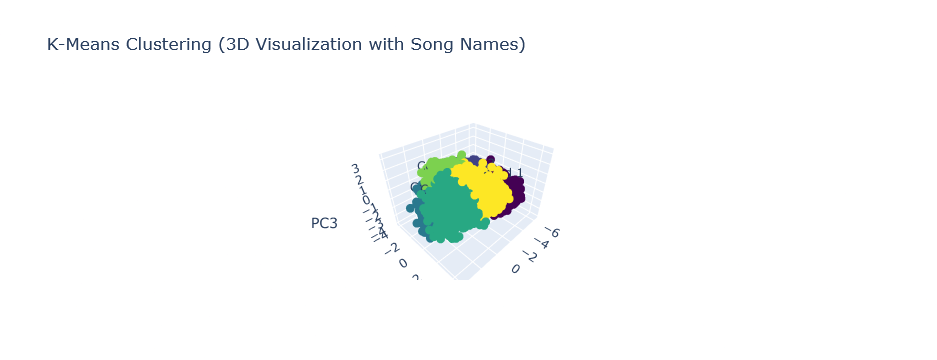

In [39]:
if __name__ == "__main__":
    pca_file_path = "data/mega/genre_cleaned_Tscores.csv"
    data = np.loadtxt(pca_file_path, delimiter=",")  # CSV file with 3 columns of PCA scores


    song_file_path = "data/mega/genre_cleaned_mega.csv"
    song_df = pd.read_csv(song_file_path)
    song_names = song_df['Track Name'].tolist()  # Extract the 'title tracks' column

    assert len(song_names) == len(data), "Mismatch between number of song names and PCA score entries."

    k = 6  # number of genres
    centroids, labels = kmeans(data, k)
    plot_clusters_3d_interactive(data, centroids, labels, song_names)

Converged after 1 iterations.
Converged after 16 iterations.
Converged after 11 iterations.
Converged after 17 iterations.
Converged after 30 iterations.
Converged after 49 iterations.
Converged after 30 iterations.
Converged after 39 iterations.
Converged after 21 iterations.
Converged after 39 iterations.


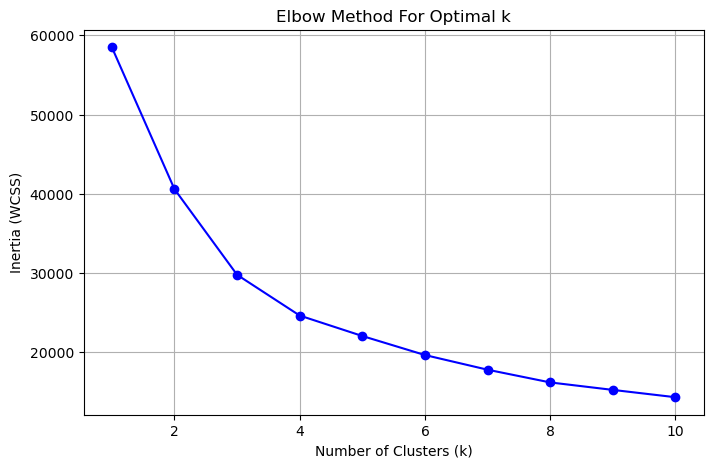

In [40]:
import matplotlib.pyplot as plt

def compute_inertia(data, centroids, labels):
    inertia = 0
    for i in range(len(data)):
        cluster_idx = labels[i]
        inertia += np.sum((data[i] - centroids[cluster_idx]) ** 2)
    return inertia

def elbow_method(data, max_k=10):
    inertias = []
    K_range = range(1, max_k + 1)
    
    for k in K_range:
        centroids, labels = kmeans(data, k)
        inertia = compute_inertia(data, centroids, labels)
        inertias.append(inertia)
    
    plt.figure(figsize=(8,5))
    plt.plot(K_range, inertias, 'bo-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (WCSS)")
    plt.title("Elbow Method For Optimal k")
    plt.grid(True)
    plt.show()

elbow_method(data, max_k=10)

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

features_to_compare = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness',
    'Valence', 'Tempo'
]
X = pd.read_csv("data/mega/cleaned_Tscores.csv")  # or use original features instead
#X = X[features_to_compare]
# Load the genre labels (you may need to adapt this depending on your dataset structure)
songs_df = pd.read_csv("data/mega/cleaned_mega.csv")
y = songs_df['Genres']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[1:], test_size=0.2)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     country       0.27      0.26      0.26       262
         edm       0.47      0.62      0.54       775
        lofi       0.50      0.03      0.05        35
       metal       0.53      0.58      0.56       846
         pop       0.38      0.31      0.34       473
         rap       0.17      0.06      0.09       272

    accuracy                           0.45      2663
   macro avg       0.39      0.31      0.31      2663
weighted avg       0.43      0.45      0.43      2663

Confusion Matrix:
 [[ 67  68   0  47  75   5]
 [ 32 484   1 184  44  30]
 [  2  12   1  11   7   2]
 [ 43 212   0 489  84  18]
 [ 78 113   0 114 146  22]
 [ 24 138   0  70  24  16]]


In [60]:
genre_map = {
    "lo-fi": "Lofi",
    "stutter house": "Lofi",
    "rock": "Metal",
    "metal": "Metal",
    "alternative": "Metal",
    "pop": "Pop",
    "indie": "Pop",         # Move to Pop for simplicity
    "hip hop": "Rap",
    "rap": "Rap",
    "trap": "Rap",
    "r&b": "Rap",       # Fold into Hip Hop
    "soul": "Rap",
    "edm": "EDM",
    "electronic": "EDM",
    "house": "EDM",
    "techno": "EDM",
    "christian": "Pop",     # Simplify to Pop
    "worship": "Pop",
    "ccm": "Pop",
    "gospel": "Pop",
    "country": "Country",
    "folk": "Country",
    "gnawa": "World",  # Not fitting into main genres
    "agronejo": "Country",
    "doo-wop": "Pop",
    "j-dance": "EDM",
    "mariachi": "World",  # Not fitting into main genres
    "phonk": "Rap",
    "aussie drill": "Rap",
    "g-funk": "Rap",
    "honky tonk": "Country",
    "japanese vgm": "EDM",  # Video game music often fits here
    "asakaa": "Rap",
    "hyphy": "Rap",
    "happy hardcore": "EDM",
    "urbano latino": "Rap",
    "musicals": "Pop",  # Simplified to Pop
    "classical": "Classical",  # Not fitting into main genres
    "americana": "Country",
    "brega": "World",  # Not fitting into main genres
    "funk melody": "EDM",
    "slowcore": "Pop",  # Simplified to Pop
    "brega funk": "Rap",
    "jersey club": "EDM",
    "idm": "EDM",
    "alté": "Rap",
    "flamenco": "World",  # Not fitting into main genres
    "pagode": "World",  # Not fitting into main genres
    "motown": "Pop",
    "post-punk": "Metal",  # Fits into the broader rock/metal category
    "grunge": "Metal",
    "breakbeat": "EDM",
    "chillstep": "EDM",
    "forró": "World",  # Not fitting into main genres
    "melbourne bounce": "EDM",
    "swedish ballads": "Pop",
    "iskelmä": "Pop",
    "trip hop": "EDM",
    "big room": "EDM",
    "nu disco": "EDM",
    "kuduro": "World",  # Not fitting into main genres
    "free jazz": "Jazz",  # Not fitting into main genres
    "future bass": "EDM",
    "funk consciente": "EDM",
    "champeta": "World",  # Not fitting into main genres
    "industrial": "Metal",
    "afrobeats": "World",  # Not fitting into main genres
    "liquid funk": "EDM",
    "neoperreo": "Rap",
    "reggae": "World",  # Not fitting into main genres
    "latin dance": "EDM",
    "funk carioca": "Rap",
    "electro": "EDM",
    "neoclassical": "Classical",  # Not fitting into main genres
    "rkt": "Rap",
    "uk garage": "EDM",
    "brazilian phonk": "Rap",
    "zouk": "World",  # Not fitting into main genres
    "adult standards": "Pop",
    "nz reggae": "World",  # Not fitting into main genres
    "miami bass": "EDM",
    "disco polo": "Pop",
    "vocaloid": "Pop",
    "baltimore club": "EDM",
    "footwork": "EDM",
    "flamenco urbano": "Rap",
    "sertanejo universitário": "Country",
    "lagu timur": "World",  # Not fitting into main genres
    "hiplife": "World",  # Not fitting into main genres
    "hardstyle": "EDM",
    "post-hardcore": "Metal",
    "turreo": "Rap",
    "salsa": "World",  # Not fitting into main genres
    "jazz fusion": "Jazz",  # Not fitting into main genres
    "avant-garde": "Experimental",  # Not fitting into main genres
    "merengue": "World",  # Not fitting into main genres
    "swing music": "Jazz",  # Not fitting into main genres
    "cold wave": "Metal",  # Fits into the broader rock/metal category
    "tekno": "EDM",
    "raï": "World",  # Not fitting into main genres
    "deathstep": "Metal",
    "afroswing": "Rap",
    "downtempo": "EDM",
    "latin": "World",  # Not fitting into main genres
    "orchestra": "Classical",  # Not fitting into main genres
    "sufi": "World",
    "sea shanties": "World",
    "amapiano": "EDM",
    "jazz blues": "Jazz",
    "cha cha cha": "World",
    "classic blues": "Blues",
    "soca": "World",
    "italo dance": "EDM",
    "soundtrack": "Pop",
    "afrobeat": "World",
    "classical piano": "Classical",
    "big beat": "EDM",
    "speedcore": "Metal",
    "samba": "World",
    "trance": "EDM",
    "roots reggae": "World",
    "punk": "Metal",
    "dance": "EDM",
    "jazz beats": "Jazz",
    "tollywood": "World",
    "dangdut": "World",
    "piseiro": "World",
    "opm": "World",
    "axé": "World",
    "progressive trance": "EDM",
    "breakcore": "Metal",
    "bachata": "World",
    "hardcore punk": "Metal",
    "comedy": "Pop",
    "bounce": "EDM",
    "epadunk": "EDM",
    "grindcore": "Metal",
    "lullaby": "Pop",
    "dark cabaret": "Experimental",
    "lagu jawa": "World",
    "boogie-woogie": "Jazz",
    "darkwave": "Metal",
    "ragga": "Reggae",
    "dark ambient": "Experimental",
    "budots": "EDM",
    "new rave": "EDM",
    "children's music": "Pop",
    "mpb": "World",
    "midwest emo": "Metal",
    "k-ballad": "Pop",
    "electro swing": "EDM",
    "sertanejo": "Country",
    "electroclash": "EDM",
    "uk drill": "Rap",
    "chilean mambo": "World",
    "russelåter": "World",
    "melodic hardcore": "Metal",
    "crunk": "Rap",
    "brooklyn drill": "Rap",
    "proto-punk": "Metal",
    "brazilian jazz": "Jazz",
    "deathcore": "Metal",
    "malay": "World",
    "son cubano": "World",
    "dancehall": "Reggae",
    "emocore": "Metal",
    "kizomba": "World",
    "emo": "Metal",
    "horrorcore": "Rap",
    "shoegaze": "Metal",
    "nerdcore": "Rap",
    "easy listening": "Pop",
    "frenchcore": "EDM",
    "hard bop": "Jazz",
    "drum and bass": "EDM",
    "riddim": "EDM",
    "eurodance": "EDM",
    "christmas": "Pop",
    "brazilian bass": "EDM",
    "schlagerparty": "Pop",
    "disco": "Pop",
    "algerian chaabi": "World",
    "boom bap": "Rap",
    "bluegrass": "Country",
    "chillwave": "EDM",
    "acid jazz": "Jazz",
    "madchester": "Rock",
    "salsa romantica": "World",
    "jazz": "Jazz",
    "dembow": "Reggae",
    "dub": "Reggae",
    "azonto": "World",
    "drumstep": "EDM",
    "drill": "Rap",
    "jazz funk": "Jazz",
    "bassline": "EDM",
    "red dirt": "Country",
    "italo disco": "EDM",
    "jungle": "EDM",
    "singer-songwriter": "Pop",
    "chanson": "Pop",
    "funkot": "EDM",
    "ragtime": "Jazz",
    "ebm": "Electronic",
    "reggaeton": "Reggae",
    "mizrahi": "World",
    "skate punk": "Metal",
    "medieval": "World",
    "afropiano": "EDM",
    "smooth jazz": "Jazz",
    "nova mpb": "World",
    "minimalism": "Experimental",
    "grime": "Rap",
    "ballroom vogue": "EDM",
    "celtic": "World",
    "ska punk": "Metal",
    "bollywood": "World",
    "french jazz": "Jazz",
    "ska": "Metal",
    "uk funky": "EDM",
    "vaporwave": "EDM",
    "funk": "Funk",
    "post-grunge": "Metal",
    "new wave": "Metal",
    "drift phonk": "Rap",
    "variété française": "Pop",
    "gufeng": "World",
    "visual kei": "Rock",
    "cool jazz": "Jazz",
    "glitch": "EDM",
    "brazilian funk": "Rap",
    "newgrass": "Country",
    "gabber": "EDM",
    "nightcore": "EDM",
    "manele": "World",
    "post-disco": "Pop",
    "melodic bass": "EDM",
    "new age": "New Age",
    "mollywood": "World",
    "moroccan chaabi": "World",
    "neue deutsche welle": "Rock",
    "moombahton": "EDM",
    "pagode baiano": "World",
    "bass music": "EDM",
    "anime": "World",
    "psytrance": "EDM",
    "freestyle": "EDM",
    "boogie": "Funk",
    "quiet storm": "R&B",
    "hi-nrg": "EDM",
    "new jack swing": "R&B",
    "nu jazz": "Jazz",
    "bolero": "World",
    "schlager": "Pop",
    "screamo": "Metal",
    "spoken word": "Pop",
    "big band": "Jazz",
    "hardcore": "Metal",
    "vocal jazz": "Jazz",
    "modern blues": "Blues",
    "dansktop": "Pop",
    "blues": "Blues",
    "latin jazz": "Jazz",
    "psychobilly": "Rock",
    "lounge": "Jazz",
    "ethiopian jazz": "Jazz",
    "bongo flava": "World",
    "dubstep": "EDM",
    "maluku": "World",
    "arrocha": "World",
    "djent": "Metal",
    "synthwave": "EDM",
    "shatta": "World",
}

In [ ]:
genre_map = {
    # Country
    "country": "country",
    "folk": "country",
    "americana": "country",
    "bluegrass": "country",
    "newgrass": "country",
    "sertanejo": "country",
    "sertanejo universitário": "country",
    "agronejo": "country",

    # Metal
    "metal": "metal",
    "rock": "metal",
    "grunge": "metal",
    "hardcore": "metal",
    "post-hardcore": "metal",
    "hardcore punk": "metal",
    "punk": "metal",
    "emo": "metal",
    "screamo": "metal",
    "deathcore": "metal",
    "grindcore": "metal",
    "horrorcore": "metal",
    "post-grunge": "metal",
    "shoegaze": "metal",
    "proto-punk": "metal",
    "ska punk": "metal",
    "skate punk": "metal",
    "alternative rock": "metal",

    # Lofi
    "lofi": "lofi",
    "chill": "lofi",
    "downtempo": "lofi",
    "jazz beats": "lofi",
    "trip hop": "lofi",
    "lounge": "lofi",
    "nu jazz": "lofi",
    "vocal jazz": "lofi",
    "jazz funk": "lofi",
    "cool jazz": "lofi",
    "neo soul": "lofi",

    # Rap
    "rap": "rap",
    "hip hop": "rap",
    "trap": "rap",
    "r&b": "rap",
    "soul": "rap",
    "funk": "rap",
    "drill": "rap",
    "grime": "rap",
    "afrobeats": "rap",
    "afrobeat": "rap",
    "afroswing": "rap",
    "alté": "rap",
    "aussie drill": "rap",
    "crunk": "rap",
    "horrorcore": "rap",
    "nerdcore": "rap",
    "hyphy": "rap",
    "phonk": "rap",
    "uk drill": "rap",
    "urbano latino": "rap",

    # Pop
    "pop": "pop",
    "indie": "pop",
    "k-pop": "pop",
    "j-pop": "pop",
    "christian": "pop",
    "worship": "pop",
    "ccm": "pop",
    "gospel": "pop",
    "christian pop": "pop",
    "pop worship": "pop",
    "chanson": "pop",
    "children's music": "pop",
    "singer-songwriter": "pop",
    "soul jazz": "pop",
    "motown": "pop",
    "quiet storm": "pop",
    "retro soul": "pop",
    "philly soul": "pop",
    "new jack swing": "pop",
    "anime": "pop",
    "musicals": "pop",
    "neoclassical": "pop",
    "new age": "pop",
    "soundtrack": "pop",

    # EDM
    "edm": "edm",
    "electronic": "edm",
    "house": "edm",
    "techno": "edm",
    "dubstep": "edm",
    "trance": "edm",
    "electro swing": "edm",
    "electroclash": "edm",
    "bass music": "edm",
    "bassline": "edm",
    "big beat": "edm",
    "big room": "edm",
    "brazilian bass": "edm",
    "breakbeat": "edm",
    "breakcore": "edm",
    "brega funk": "edm",
    "budots": "edm",
    "dancehall": "edm",
    "drum and bass": "edm",
    "drumstep": "edm",
    "dub": "edm",
    "eurodance": "edm",
    "footwork": "edm",
    "future bass": "edm",
    "gabber": "edm",
    "frenchcore": "edm",
    "happy hardcore": "edm",
    "hardstyle": "edm",
    "melbourne bounce": "edm",
    "melodic bass": "edm",
    "miami bass": "edm",
    "moombahton": "edm",
    "neoperreo": "edm",
    "nightcore": "edm",
    "nu disco": "edm",
    "post-disco": "edm",
    "progressive trance": "edm",
    "psytrance": "edm",
    "riddim": "edm",
    "speedcore": "edm",
    "synthwave": "edm",
    "tekno": "edm",
    "trip hop": "edm",
    "uk funky": "edm",
    "uk garage": "edm",
    "vocaloid": "edm",
    "amapiano": "edm",
    "afropiano": "edm",
}